In [1]:
import pandas as pd
df=pd.read_csv('E:\\C\\数据工程\\bike.csv')
print(df.head())

   id  city  hour  is_workday  weather  temp_air  temp_body  wind   y
0   1     0    22           1        2       3.0        0.7     0  15
1   2     0    10           1        1      21.0       24.9     3  48
2   3     0     0           1        1      25.3       27.4     0  21
3   4     0     7           0        1      15.7       16.2     0  11
4   5     1    10           1        1      21.1       25.0     2  39


In [2]:
import pandas as pd
df=pd.read_csv('E:\\C\\数据工程\\bike.csv')
df_dropped = df.drop(columns=['id'])
print(df_dropped.head())
df_dropped.to_csv('E:\\C\\数据工程\\bike_without.csv', index=False)

   city  hour  is_workday  weather  temp_air  temp_body  wind   y
0     0    22           1        2       3.0        0.7     0  15
1     0    10           1        1      21.0       24.9     3  48
2     0     0           1        1      25.3       27.4     0  21
3     0     7           0        1      15.7       16.2     0  11
4     1    10           1        1      21.1       25.0     2  39


In [3]:
import pandas as pd
df = pd.read_csv('E:\\C\\数据工程\\bike_without.csv')

df_filtered = df[df['city'] == 1]

print(df_filtered.head())

df_filtered.to_csv('E:\\C\\数据工程\\bike_without.csv', index=False)

    city  hour  is_workday  weather  temp_air  temp_body  wind   y
4      1    10           1        1      21.1       25.0     2  39
5      1     0           1        1      20.4       18.2     0  12
9      1     4           1        3      17.4       18.0     3   2
10     1     0           1        1      14.9       15.3     2   6
11     1     8           0        1      25.0       28.1     0  25


In [4]:
import pandas as pd
df=pd.read_csv('E:\\C\\数据工程\\bike_without.csv')
df_dropped = df.drop(columns=['city'])
print(df_dropped.head())
df_dropped.to_csv('E:\\C\\数据工程\\bike_without.csv', index=False)

   hour  is_workday  weather  temp_air  temp_body  wind   y
0    10           1        1      21.1       25.0     2  39
1     0           1        1      20.4       18.2     0  12
2     4           1        3      17.4       18.0     3   2
3     0           1        1      14.9       15.3     2   6
4     8           0        1      25.0       28.1     0  25


In [5]:
import pandas as pd

df = pd.read_csv('E:\\C\\数据工程\\bike_without.csv')

df['hour'] = ((df['hour'] >= 6) & (df['hour'] <= 18)).astype(int)

print(df.head())
df.to_csv('E:\\C\\数据工程\\bike_without.csv', index=False)

   hour  is_workday  weather  temp_air  temp_body  wind   y
0     1           1        1      21.1       25.0     2  39
1     0           1        1      20.4       18.2     0  12
2     0           1        3      17.4       18.0     3   2
3     0           1        1      14.9       15.3     2   6
4     1           0        1      25.0       28.1     0  25


In [6]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error 
import math 

df = pd.read_csv('E:\\C\\数据工程\\bike_without.csv') 

y = df['y'].values.reshape(-1, 1)

X = df.drop(columns=['y']).values 

# 将数据集划分为训练集和测试集，比例为8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 使用train_test_split按8:2划分数据集，并设置随机种子以确保结果可复现

# 对训练集和测试集的特征进行归一化
scaler = StandardScaler()  # 初始化StandardScaler对象
X_train = scaler.fit_transform(X_train)  # 对训练集特征进行拟合和转换（归一化）
X_test = scaler.transform(X_test)  # 对测试集特征进行转换（使用训练集拟合的参数）

# 对训练集和测试集的标签也进行归一化（注意：通常只对特征进行归一化，但这里为了完整性也归一化标签）
scaler_y = StandardScaler()  # 初始化另一个StandardScaler对象用于标签归一化
y_train_scaled = scaler_y.fit_transform(y_train)  # 对训练集标签进行拟合和转换（归一化）
y_test_scaled = scaler_y.transform(y_test)  # 对测试集标签进行转换（使用训练集拟合的参数）

# 构建线性回归模型
model = LinearRegression()  # 初始化线性回归模型对象

# 利用训练集训练模型
model.fit(X_train, y_train_scaled.flatten())  # 使用flatten()将y_train_scaled转换为一维数组，然后训练模型

# 利用测试集对训练好的模型进行评估
y_pred_scaled = model.predict(X_test)  # 使用测试集特征进行预测，得到归一化后的预测值

# 正确的逆归一化和RMSE计算步骤：
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[:, 0]  # 逆归一化预测值
rmse = math.sqrt(mean_squared_error(y_test.flatten(), y_pred))  # 计算RMSE

# 输出RMSE值
print(f"RMSE: {rmse}") 


RMSE: 31.56847863511329


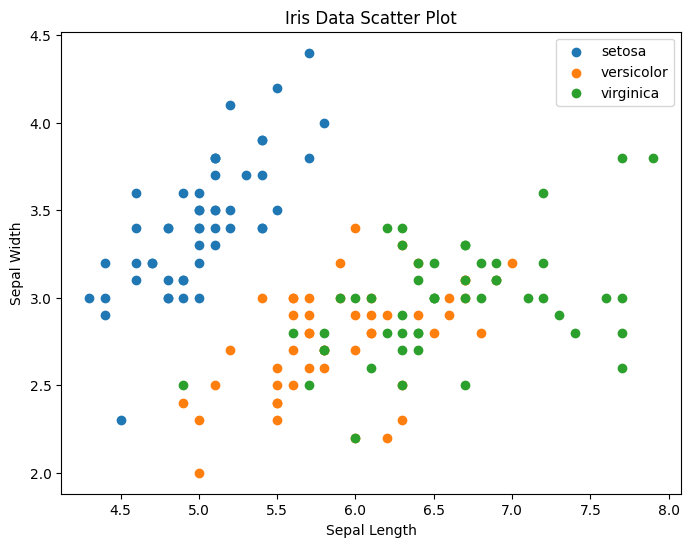

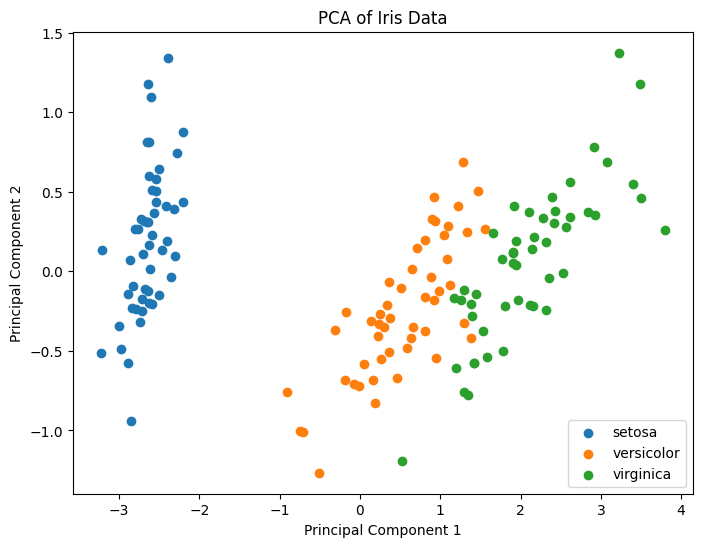

Classification accuracy: 1.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分数据集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图
plt.figure(figsize=(8, 6))
for target_name, target_value in zip(iris.target_names, np.unique(y)):
    indices_to_keep = y == target_value
    plt.scatter(X[indices_to_keep, 0], X[indices_to_keep, 1], label=target_name)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data Scatter Plot')
plt.legend()
plt.show()

# 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for target_name, target_value in zip(iris.target_names, np.unique(y)):
    indices_to_keep = y == target_value
    plt.scatter(X_pca[indices_to_keep, 0], X_pca[indices_to_keep, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Data')
plt.legend()
plt.show()

# 以K=3训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 在测试集上进行测试，最后输出分类准确率
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification accuracy: {accuracy:.2f}')